In [1]:
#TODO 
#-make a function to draw a line from the origin at any angle
#-see if the whole thing works with other images
#-finally we have to account for angles that are the same like 135 and 315 and -45

In [2]:
import os, sys
import cv2
import numpy as np
from PIL import Image
from PIL import ImageOps
import matplotlib.pyplot as plt
import math

In [3]:
path_images = 'conv2d_output_inv_greeble_new_params'
# path_images = 'conv2d_output_random_AT'
image_filenames = os.listdir(path_images)
image_filenames

['input_init_conv_Conv2D_00.png',
 'input_init_conv_Conv2D_01.png',
 'input_init_conv_Conv2D_02.png',
 'input_init_conv_Conv2D_03.png',
 'input_init_conv_Conv2D_04.png',
 'input_init_conv_Conv2D_05.png',
 'input_init_conv_Conv2D_06.png',
 'input_init_conv_Conv2D_07.png',
 'input_init_conv_Conv2D_08.png',
 'input_init_conv_Conv2D_09.png',
 'input_init_conv_Conv2D_10.png',
 'input_init_conv_Conv2D_11.png',
 'input_init_conv_Conv2D_12.png',
 'input_init_conv_Conv2D_13.png',
 'input_init_conv_Conv2D_14.png',
 'input_init_conv_Conv2D_15.png',
 'unit_1_0_sub1_conv1_Conv2D_00.png',
 'unit_1_0_sub1_conv1_Conv2D_01.png',
 'unit_1_0_sub1_conv1_Conv2D_02.png',
 'unit_1_0_sub1_conv1_Conv2D_03.png',
 'unit_1_0_sub1_conv1_Conv2D_04.png',
 'unit_1_0_sub1_conv1_Conv2D_05.png',
 'unit_1_0_sub1_conv1_Conv2D_06.png',
 'unit_1_0_sub1_conv1_Conv2D_07.png',
 'unit_1_0_sub1_conv1_Conv2D_08.png',
 'unit_1_0_sub1_conv1_Conv2D_09.png',
 'unit_1_0_sub1_conv1_Conv2D_10.png',
 'unit_1_0_sub1_conv1_Conv2D_11.png',


In [4]:
# How much to crop from each side of the image
border = (7, 23, 7, 7) # left, top, right, bottom

original_images = []
for fname in image_filenames:
    img = Image.open(os.path.join(path_images, fname))
    img = ImageOps.crop(img, border)
    img = np.array(img)[...,:3]
    original_images.append(img)
    
original_images = np.array(original_images)
print("n:{}, w:{}, h:{}, c:{}".format(*original_images.shape))

n:889, w:250, h:250, c:3


Img Min:68.000, Img Median:118.000, Img Max: 255.000
<PIL.Image.Image image mode=RGB size=250x250 at 0x166FFF36588>


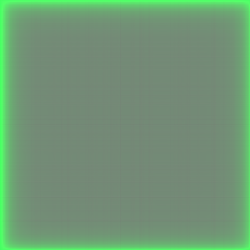

In [26]:
# Test image
# img_name = 'unit_1_3_sub2_conv2_Conv2D_14.png'
# img_name = 'unit_1_3_sub2_conv2_Conv2D_10.png'
# img_name = 'unit_1_4_sub2_conv2_Conv2D_14.png'
img_name = 'input_init_conv_Conv2D_00.png' #bad image


img_id = image_filenames.index(img_name)

img0 = original_images[img_id]
img0_PIL = Image.fromarray(img0) # convert to PIL image

print("Img Min:{:.3f}, Img Median:{:.3f}, Img Max: {:.3f}".format(np.min(img0), np.median(img0), np.max(img0)))

print(img0_PIL)
display(img0_PIL)

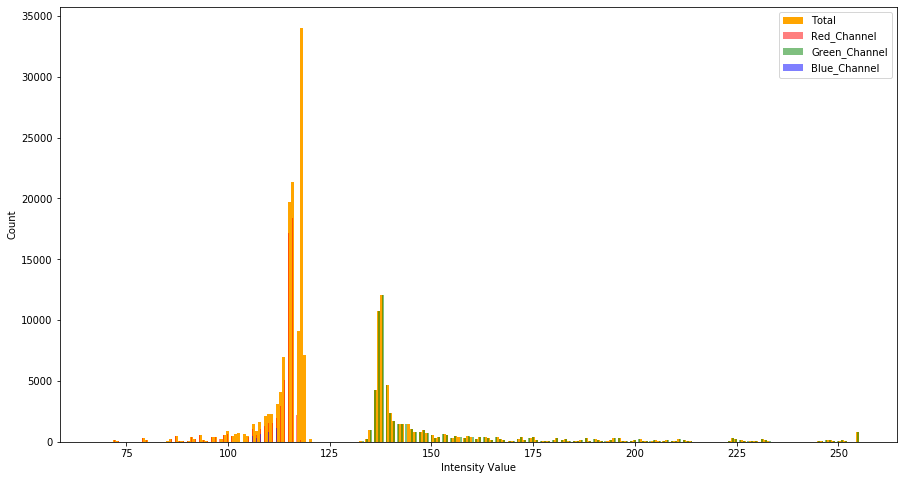

In [27]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

# Set image plot settings
fig = plt.figure()
fig.set_size_inches((15, 8))
PRINT_OUTLIERS = True

if PRINT_OUTLIERS:
    # Plot histogram
    _ = plt.hist(img0.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img0[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img0[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img0[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
else:
    # Plot histogram - without outliers
    filteredt = img0[~is_outlier(img0)]
    filtered0 = img0[:, :, 0][~is_outlier(img0[:, :, 0])]
    filtered1 = img0[:, :, 1][~is_outlier(img0[:, :, 1])]
    filtered2 = img0[:, :, 2][~is_outlier(img0[:, :, 2])]
    _ = plt.hist(filteredt.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(filtered0.ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(filtered1.ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(filtered2.ravel(), bins = 256, color = 'Blue', alpha = 0.5)

_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

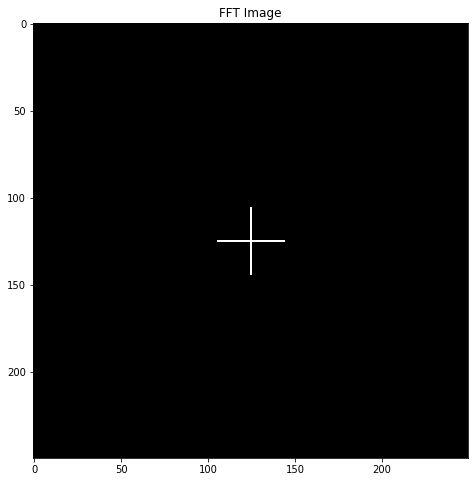

In [28]:
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 

# test_image = np.array(Image.open('yarn_test.png'))
test_image = img0

gray = gray(test_image)
# plt.imshow(gray, cmap = plt.get_cmap(name = 'gray'))

f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fig = plt.figure()
fig.set_size_inches((12, 8))

plt.title('FFT Image')
plt.imshow(magnitude_spectrum, cmap = plt.get_cmap(name = 'gray'))

ret,thresh1 = cv2.threshold(magnitude_spectrum,195,255,cv2.THRESH_BINARY)
plt.imshow(thresh1,'gray')

img = thresh1

# IF NEEDED, when using moments there seems to be no need, PCA does
# kernel = np.ones((3,3),np.uint8)
# img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
# kernel = np.ones((5,5),np.uint8)
# img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
# plt.imshow(img,'gray')

#############
# kernel = np.ones((3,3),np.uint8)
# dilation = cv2.dilate(img,kernel,iterations = 1)
# plt.imshow(dilation,'gray')

# kernel = np.ones((5,5),np.uint8)
# closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
# plt.imshow(closing,'gray')

# kernel = np.ones((3,3),np.uint8)
# erosion = cv2.erode(closing,kernel,iterations = 2)
# plt.imshow(erosion,'gray')

In [8]:
img_gray = (img*255).astype(np.uint8)
# plt.imshow(img_gray)
moments1 = cv2.moments(img)

# http://raphael.candelier.fr/?blog=Image%20Moments
m00 = moments1['m00']
m10 = moments1['m10']
m01 = moments1['m01']
m11 = moments1['m11']
m02 = moments1['m02']
m20 = moments1['m20']

try:
    # Barycenter
    xx = m10/m00
    yy = m01/m00

    # Central moments (intermediary step)
    a = m20/m00 - xx**2
    b = 2*(m11/m00 - xx*yy)
    c = m02/m00 - yy**2

    # Orientation (radians)
    theta = 1/2*math.atan(b/(a-c)) + (a<c)*math.pi/2;
    thetaR = theta
    theta = np.rad2deg(theta) % 180 #convert to degrees in range
except:
    e = str(sys.exc_info()[0]).split("'")
    print(e[1])
    theta = -1
    thetaR = -1

print("Theta:",theta)

Theta: 175.03245115327


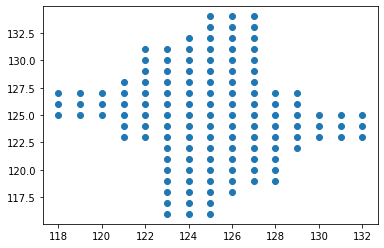

In [9]:
# mean, eigvec = cv2.PCACompute(img, mean=None)
# eigvec
points = np.argwhere(img == 255)
plt.scatter(points[:,0],points[:,1])

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(points)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 0.0865915 -0.9962439]
 [-0.9962439 -0.0865915]]
[0.67670759 0.32329241]


62.5
3.054892570460707
(-62.26524384562758, 5.4119690358072825)
Var: 0.6767, PCA Angle: 94.9675488467254, Moment Angle: 175.03245115327


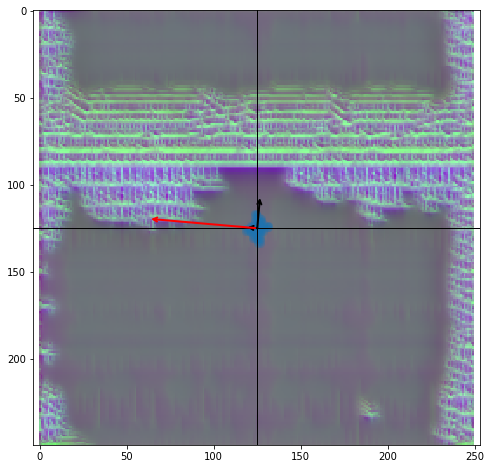

In [12]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops, annotation_clip=False)

fig = plt.figure()
fig.set_size_inches((8, 8))
# plot data
plt.imshow(test_image)
plt.scatter(points[:, 0], points[:, 1], alpha=0.2)
for length, vector, mag in zip(pca.explained_variance_, pca.components_, pca.explained_variance_ratio_):
    v = vector * (6*mag) * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

xy = pol2cart(test_image.shape[0]/4, thetaR%math.pi)
xy_origin = test_image.shape[0]/2
print(test_image.shape[0]/4)
print(thetaR%math.pi)
print(xy)
ax = plt.gca()
arrowprops=dict(arrowstyle='->',linewidth=2, color='r')
ax.annotate('', xy=(xy_origin+xy[0], xy_origin-xy[1]), xytext=(xy_origin, xy_origin), arrowprops=arrowprops, annotation_clip=False)

ax.axhline(y=xy_origin, color='k',linewidth=1)
ax.axvline(x=xy_origin, color='k',linewidth=1)

plt.axis('equal');
# plt.ylim(np.min(points[:, 1]), np.max(points[:, 1]))
# plt.xlim(np.min(points[:, 0]), np.max(points[:, 0]))

pc1var = pca.explained_variance_ratio_[0]
angle = math.atan2(pca.components_[0][1], pca.components_[0][0])
angle = np.rad2deg(angle) % 180 #convert to degrees in range
print("Var: {:.4f}, PCA Angle: {}, Moment Angle: {}".format(pc1var,angle, theta))
# plt.title("PCA Angle: "+str(angle))
plt.show()
# points